In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import seaborn as sns
from statannotations.Annotator import Annotator

ROOT_PATH="metrics/"
DATABASES=["ses-0", "ses-1", "ses-2", "ses-3"]
SPACE_RES=[0.4, 0.4, 0.4, 0.5]
SUBJECTS=["sub-Noe","sub-Olivier","sub-Ota1","sub-Palme","sub-Pesto","sub-Prune","sub-Oasis","sub-Omelette","sub-Oz",
     "sub-Papou","sub-Phyllis","sub-Puma","sub-Odin","sub-Omer","sub-Pau","sub-Picsou","sub-Odor","sub-Omerta","sub-Ozy",
     "sub-Pepita","sub-Prouesse","sub-BaBa21"]

In [2]:
df = []
def is_non_zero_file(fpath):  
    return os.path.isfile(fpath) and os.path.getsize(fpath) > 0

for idx,DATABASE in enumerate(DATABASES):
    
    for sub_idx,subject in enumerate(SUBJECTS):
        
        filename=ROOT_PATH + DATABASE+"/"+str(subject) + "_CSF.csv"
        
        if is_non_zero_file(filename)==True:
            sub = pd.read_csv(filename, delimiter=',' )
            sub['Timepoint']=DATABASES[idx]
            sub['sub_ID']='%03d'%sub_idx
            sub['tissues']='CSF'
            sub['atlas']='tissues'
            sub['sub_NAME']=subject
            df.append(sub)
        
        filename=ROOT_PATH + DATABASE+"/"+str(subject) + "_WM.csv"
        
        if is_non_zero_file(filename)==True:
            sub = pd.read_csv(filename, delimiter=',' )
            sub['Timepoint']=DATABASES[idx]
            sub['sub_ID']='%03d'%sub_idx
            sub['tissues']='WM'
            sub['atlas']='tissues'
            sub['sub_NAME']=subject
            df.append(sub)

        filename=ROOT_PATH + DATABASE+"/"+str(subject) + "_GM.csv"
        
        if is_non_zero_file(filename)==True:
            sub = pd.read_csv(filename, delimiter=',' )
            sub['Timepoint']=DATABASES[idx]
            sub['sub_ID']='%03d'%sub_idx
            sub['tissues']='GM'
            sub['atlas']='tissues'
            sub['sub_NAME']=subject
            df.append(sub)

            #fake brainmask
            sub_BM = pd.read_csv(filename, delimiter=',' )
            sub_BM['Timepoint']=DATABASES[idx]
            sub_BM['sub_ID']='%03d'%sub_idx
            sub_BM['tissues']='BM'
            sub_BM['sub_NAME']=subject
            sub_BM['VolumeInVoxels']= float(0.0)
            sub_BM['atlas']='brainmask'
            df.append(sub_BM)

data = pd.concat(df, ignore_index=True)

In [3]:
data.to_csv('brain_tissues_mask.csv')
data 

,Label,VolumeInVoxels,SurfaceAreaInMillimetersSquared,Eccentricity,Elongation,Orientation,Centroid_x,Centroid_y,Centroid_z,AxesLength_x,...,BoundingBoxUpper_x,BoundingBoxLower_y,BoundingBoxUpper_y,BoundingBoxLower_z,BoundingBoxUpper_z,Timepoint,sub_ID,tissues,atlas,sub_NAME
0,1,376854.0,46736.383158,0.748643,1.508357,2.808037,136.157353,78.450633,104.521645,116.981514,...,214,17,145,12,202,ses-0,000,CSF,tissues,sub-Noe
1,1,644151.0,43960.307291,0.751769,1.516470,2.005222,138.026790,78.475805,100.465509,98.835777,...,213,19,145,14,202,ses-0,000,WM,tissues,sub-Noe
2,1,733784.0,77128.969499,0.798494,1.661122,0.334299,137.994839,74.723130,102.824391,103.305962,...,214,17,146,3,202,ses-0,000,GM,tissues,sub-Noe
3,1,0.0,77128.969499,0.798494,1.661122,0.334299,137.994839,74.723130,102.824391,103.305962,...,214,17,146,3,202,ses-0,000,BM,brainmask,sub-Noe
4,1,196675.0,37106.592387,0.675336,1.355913,1.939404,137.072221,101.225911,179.753349,122.728256,...,215,16,198,107,244,ses-0,001,CSF,tissues,sub-Olivier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,1,0.0,79989.876984,0.717236,1.435069,1.703141,110.566829,96.393791,264.449900,100.118980,...,180,22,189,188,320,ses-3,020,BM,brainmask,sub-Prouesse
344,1,566675.0,55155.024450,0.723157,1.447841,1.566595,166.984856,154.910751,175.253306,149.655014,...,261,57,282,82,243,ses-3,021,CSF,tissues,sub-BaBa21
345,1,824424.0,37852.063777,0.708051,1.416107,1.565696,166.972034,155.475631,173.788877,116.660896,...,252,64,272,88,236,ses-3,021,WM,tissues,sub-BaBa21
346,1,1507928.0,70395.994163,0.771538,1.571875,1.569393,166.983168,158.733361,171.428950,124.095894,...,258,59,278,72,240,ses-3,021,GM,tissues,sub-BaBa21


In [4]:
## delete unused columns 
data_clean = data.drop(data.columns[3:18], axis=1)
data_clean

,Label,VolumeInVoxels,SurfaceAreaInMillimetersSquared,Timepoint,sub_ID,tissues,atlas,sub_NAME
0,1,376854.0,46736.383158,ses-0,000,CSF,tissues,sub-Noe
1,1,644151.0,43960.307291,ses-0,000,WM,tissues,sub-Noe
2,1,733784.0,77128.969499,ses-0,000,GM,tissues,sub-Noe
3,1,0.0,77128.969499,ses-0,000,BM,brainmask,sub-Noe
4,1,196675.0,37106.592387,ses-0,001,CSF,tissues,sub-Olivier
...,...,...,...,...,...,...,...,...
343,1,0.0,79989.876984,ses-3,020,BM,brainmask,sub-Prouesse
344,1,566675.0,55155.024450,ses-3,021,CSF,tissues,sub-BaBa21
345,1,824424.0,37852.063777,ses-3,021,WM,tissues,sub-BaBa21
346,1,1507928.0,70395.994163,ses-3,021,GM,tissues,sub-BaBa21


In [5]:
for time in DATABASES:
    for Subj in data_clean['sub_ID'].unique():
        filter1 = (data_clean['Timepoint'] == time) & (data_clean['sub_ID'] == Subj)
        data_clean.loc[filter1, 'VolumeIn_mm3'] = (data_clean.loc[filter1, 'VolumeInVoxels'] * 0.4 * 0.4 * 0.4)

filter2 = (data_clean['Timepoint'] == "ses-3") & (data_clean['sub_NAME'] != "sub-BaBa21")
data_clean.loc[filter2, 'VolumeIn_mm3'] = (data_clean.loc[filter2, 'VolumeInVoxels'] * 0.5 * 0.5 * 0.5)

for time in DATABASES:
    for Subj in data_clean['sub_ID'].unique():
        filter1 = (data_clean['Timepoint'] == time) & (data_clean['sub_ID'] == Subj)
        data_clean.loc[filter1, 'VolumeIn_cm3'] = (data_clean.loc[filter1, 'VolumeInVoxels'] * 0.4 * 0.4 * 0.4 /1000. )

filter2 = (data_clean['Timepoint'] == "ses-3") & (data_clean['sub_NAME'] != "sub-BaBa21")
data_clean.loc[filter2, 'VolumeIn_cm3'] = (data_clean.loc[filter2, 'VolumeInVoxels'] * 0.5 * 0.5 * 0.5 / 1000.)


In [6]:
data_clean

,Label,VolumeInVoxels,SurfaceAreaInMillimetersSquared,Timepoint,sub_ID,tissues,atlas,sub_NAME,VolumeIn_mm3,VolumeIn_cm3
0,1,376854.0,46736.383158,ses-0,000,CSF,tissues,sub-Noe,24118.656,24.118656
1,1,644151.0,43960.307291,ses-0,000,WM,tissues,sub-Noe,41225.664,41.225664
2,1,733784.0,77128.969499,ses-0,000,GM,tissues,sub-Noe,46962.176,46.962176
3,1,0.0,77128.969499,ses-0,000,BM,brainmask,sub-Noe,0.000,0.000000
4,1,196675.0,37106.592387,ses-0,001,CSF,tissues,sub-Olivier,12587.200,12.587200
...,...,...,...,...,...,...,...,...,...,...
343,1,0.0,79989.876984,ses-3,020,BM,brainmask,sub-Prouesse,0.000,0.000000
344,1,566675.0,55155.024450,ses-3,021,CSF,tissues,sub-BaBa21,36267.200,36.267200
345,1,824424.0,37852.063777,ses-3,021,WM,tissues,sub-BaBa21,52763.136,52.763136
346,1,1507928.0,70395.994163,ses-3,021,GM,tissues,sub-BaBa21,96507.392,96.507392


In [7]:
for time in DATABASES:
    for Subj in data_clean['sub_ID'].unique():
            
        filter1 = (data_clean['Timepoint'] == time) & (data_clean['sub_ID'] == Subj)
        filter_CSF = (data_clean['Timepoint'] == time) & (data_clean['sub_ID'] == Subj) & (data_clean['tissues'] == "CSF")
        filter_GM = (data_clean['Timepoint'] == time) & (data_clean['sub_ID'] == Subj) & (data_clean['tissues'] == "GM")
        filter_WM = (data_clean['Timepoint'] == time) & (data_clean['sub_ID'] == Subj) & (data_clean['tissues'] == "WM")
        filter_BM = (data_clean['Timepoint'] == time) & (data_clean['sub_ID'] == Subj) & (data_clean['tissues'] == "BM")

        data_clean.loc[filter_BM, 'VolumeIn_mm3'] = (data_clean.loc[filter_WM, 'VolumeIn_mm3'].sum() +
        data_clean.loc[filter_CSF, 'VolumeIn_mm3'].sum() +
        data_clean.loc[filter_GM, 'VolumeIn_mm3'].sum())
        data_clean.loc[filter_BM, 'VolumeIn_cm3'] = (data_clean.loc[filter_WM, 'VolumeIn_cm3'].sum() +
        data_clean.loc[filter_CSF, 'VolumeIn_cm3'].sum() +
        data_clean.loc[filter_GM, 'VolumeIn_cm3'].sum())

        for tissues in data_clean['tissues'].unique():
            filter_tissues = (data_clean['Timepoint'] == time) & (data_clean['sub_ID'] == Subj) & (data_clean['tissues'] == tissues) 
            data_clean.loc[filter_tissues,'TIV'] = data_clean[filter_tissues]['VolumeIn_mm3'].mean() / data_clean[filter_BM]['VolumeIn_mm3'].mean()
            data_clean.loc[filter_tissues,'TIV'] = data_clean[filter_tissues]['VolumeIn_cm3'].mean() / data_clean[filter_BM]['VolumeIn_cm3'].mean()



In [8]:
data_clean

,Label,VolumeInVoxels,SurfaceAreaInMillimetersSquared,Timepoint,sub_ID,tissues,atlas,sub_NAME,VolumeIn_mm3,VolumeIn_cm3,TIV
0,1,376854.0,46736.383158,ses-0,000,CSF,tissues,sub-Noe,24118.656,24.118656,0.214757
1,1,644151.0,43960.307291,ses-0,000,WM,tissues,sub-Noe,41225.664,41.225664,0.367082
2,1,733784.0,77128.969499,ses-0,000,GM,tissues,sub-Noe,46962.176,46.962176,0.418161
3,1,0.0,77128.969499,ses-0,000,BM,brainmask,sub-Noe,112306.496,112.306496,1.000000
4,1,196675.0,37106.592387,ses-0,001,CSF,tissues,sub-Olivier,12587.200,12.587200,0.111123
...,...,...,...,...,...,...,...,...,...,...,...
343,1,0.0,79989.876984,ses-3,020,BM,brainmask,sub-Prouesse,164887.750,164.887750,1.000000
344,1,566675.0,55155.024450,ses-3,021,CSF,tissues,sub-BaBa21,36267.200,36.267200,0.195471
345,1,824424.0,37852.063777,ses-3,021,WM,tissues,sub-BaBa21,52763.136,52.763136,0.284380
346,1,1507928.0,70395.994163,ses-3,021,GM,tissues,sub-BaBa21,96507.392,96.507392,0.520150


In [9]:
filter_brainmask = (data_clean['atlas'] == 'brainmask') 
data_clean.to_csv('brain_tissues_mask_clean.csv') 

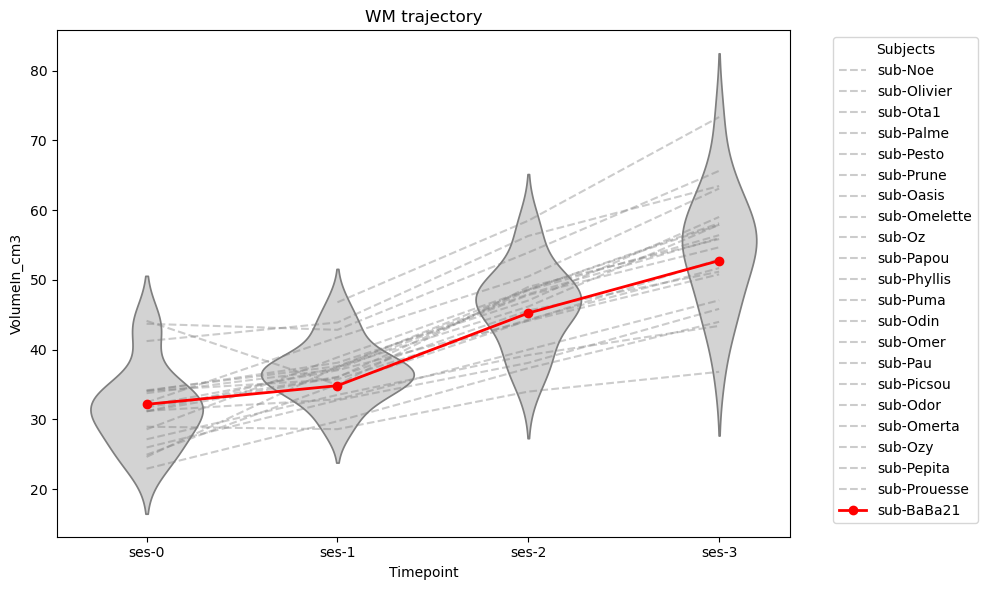

In [10]:
subject_id = "021"   # excluded subject (BaBa21)
tissue = "WM"        # exemple : tu veux regarder le GM

plt.figure(figsize=(10,6))

sns.violinplot(
    data=data_clean[(data_clean["tissues"] == tissue) & (data_clean["sub_ID"] != subject_id)], 
    x="Timepoint", y="VolumeIn_cm3",
    inner=None, color="lightgray"
)

df_others = data_clean[(data_clean["tissues"] == tissue) & (data_clean["sub_ID"] != subject_id)]
for sid, df_sid in df_others.groupby("sub_ID"):
    sub_name = df_sid["sub_NAME"].iloc[0]  # récupérer le nom associé
    plt.plot(df_sid["Timepoint"], df_sid["VolumeIn_cm3"], 
             color="gray", linestyle="--", alpha=0.4, label=sub_name)

df_sub = data_clean[(data_clean["sub_ID"] == subject_id) & (data_clean["tissues"] == tissue)]
sub_name_target = df_sub["sub_NAME"].iloc[0]
plt.plot(df_sub["Timepoint"], df_sub["VolumeIn_cm3"], 
         marker="o", color="red", linewidth=2, label=sub_name_target)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Subjects")

plt.title(f"{tissue} trajectory")
plt.tight_layout()
plt.show()

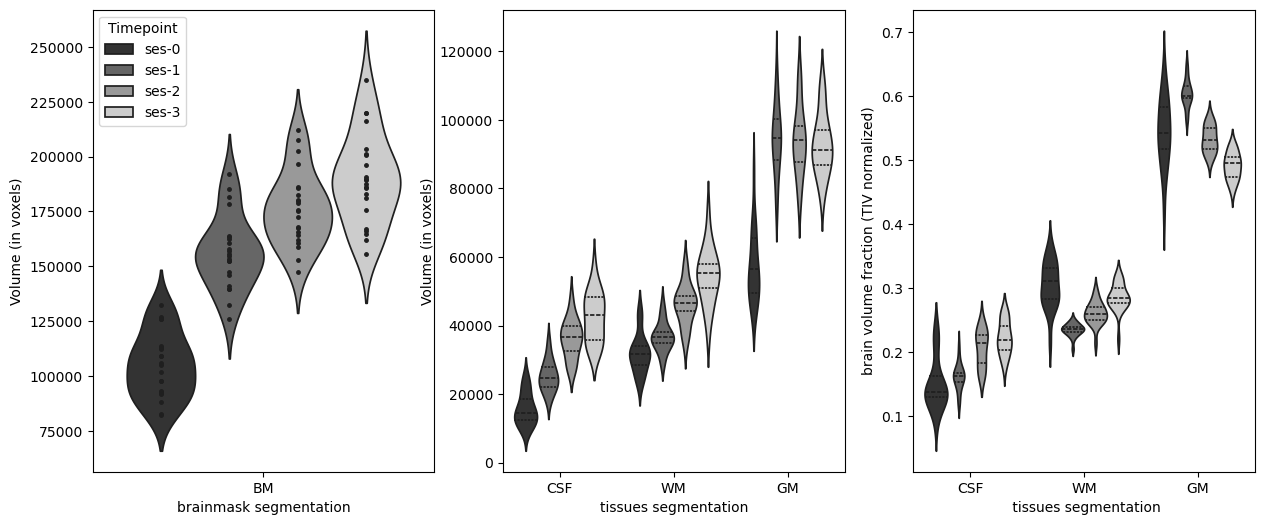

In [11]:
fig, axes = plt.subplots(1,3,figsize=(15, 6))

sns.violinplot(x='tissues', y='VolumeIn_mm3', hue='Timepoint', 
               data = data_clean[data_clean.atlas=='brainmask'],  
               ax=axes[0],palette="gray",inner="points")
axes[0].set_xlabel('brainmask segmentation')
axes[0].set_ylabel('Volume (in voxels)')

sns.violinplot(x='tissues', y='VolumeIn_mm3', hue='Timepoint',
               data = data_clean[data_clean.atlas=='tissues'],  
               ax=axes[1],palette="gray",inner="quart")
axes[1].set_xlabel('tissues segmentation')
axes[1].set_ylabel('Volume (in voxels)')

axes[1].get_legend().set_visible(False)

sns.violinplot(x='tissues', y='TIV', hue='Timepoint',
               data = data_clean[data_clean.atlas=='tissues'],  
               ax=axes[2],palette="gray",inner="quart")
axes[2].set_xlabel(' tissues segmentation')
axes[2].set_ylabel('brain volume fraction (TIV normalized)')

axes[2].get_legend().set_visible(False)

filename="Tissues_volumetry.pdf"
fig.savefig(filename)  

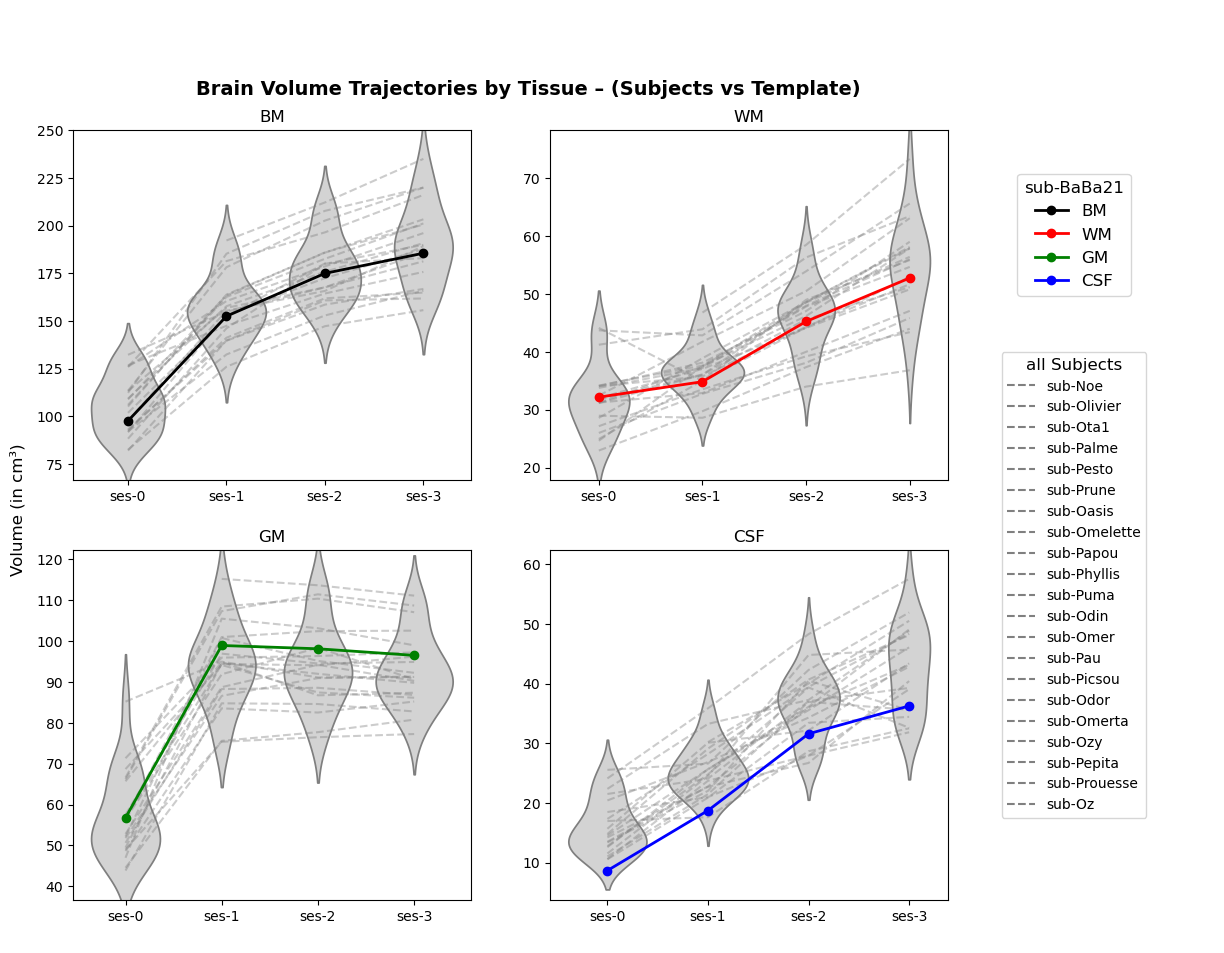

In [12]:
subject_id = "021"  # sub_BaBa21
tissues_list = ["BM", "WM", "GM", "CSF"]
colors = {"BM": "black", "WM": "red", "GM": "green", "CSF": "blue"}

fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=False)
axes = axes.flatten()

fig.suptitle("Brain Volume Trajectories by Tissue – (Subjects vs Template)", 
             fontsize=14, fontweight='bold', y=0.93,x=0.45)

for i, tissue in enumerate(tissues_list):
    ax = axes[i]
    
    data_t = data_clean[(data_clean["tissues"]==tissue) & (data_clean["sub_ID"]!=subject_id)]
    sns.violinplot(
        data=data_t, x="Timepoint", y="VolumeIn_cm3",
        inner=None, color="lightgray", ax=ax
    )
    
    for sid, df_sid in data_t.groupby("sub_ID"):
        ax.plot(df_sid["Timepoint"], df_sid["VolumeIn_cm3"],
                color="gray", linestyle="--", alpha=0.4)
    
    df_sub = data_clean[(data_clean["sub_ID"]==subject_id) & (data_clean["tissues"]==tissue)]
    ax.plot(df_sub["Timepoint"], df_sub["VolumeIn_cm3"],
            marker="o", color=colors[tissue], linewidth=2, label=tissue)
    
    ax.set_title(tissue)
    ax.set_xlabel(" ")
    ax.set_ylabel(" ")
    y_min = min(data_t["VolumeIn_cm3"].min(), df_sub["VolumeIn_cm3"].min())
    y_max = max(data_t["VolumeIn_cm3"].max(), df_sub["VolumeIn_cm3"].max())
    margin = (y_max - y_min) * 0.1
    ax.set_ylim(y_min - margin, y_max + margin)

fig.subplots_adjust(right=0.75)  

# axe pour légende des tissus (en haut à droite)
legend_ax1 = fig.add_axes([0.74, 0.55, 0.2, 0.45])
legend_ax1.axis("off")
handles_tissues = [plt.Line2D([0], [0], color=colors[t], marker='o', lw=2) for t in tissues_list]
labels_tissues = tissues_list
legend_ax1.legend(handles_tissues, labels_tissues, title="sub-BaBa21", fontsize=12, title_fontsize=12, loc='center')

# axe pour légende des sujets (en bas à droite)
legend_ax2 = fig.add_axes([0.74, 0.2, 0.2, 0.45])
legend_ax2.axis("off")
# filtrer tous les sujets sauf sub_BaBa21
data_others = data_clean[data_clean['sub_NAME'] != "sub-BaBa21"]

# handles pour la légende uniquement des autres sujets
all_subjects = data_others['sub_NAME'].unique()

handles_subjects = [plt.Line2D([0], [0], color='gray', linestyle='--') for _ in all_subjects]

# créer la légende
legend_ax2.legend(handles_subjects, all_subjects, title="all Subjects",
                  fontsize=10, title_fontsize=12, loc='center')

fig.text(0.08, 0.5, "Volume (in cm³)", va='center', rotation='vertical', fontsize=12)
plt.show()

filename="BrainVolume_Trajectories_sub_BaBa21.pdf"
fig.savefig(filename) 